# ISLR Chapter 9 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

In [1]:
require(e1071)
require(ROCR)
require(ISLR)
require(tidyverse)

Loading required package: e1071
Loading required package: ROCR
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: ISLR
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### 4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

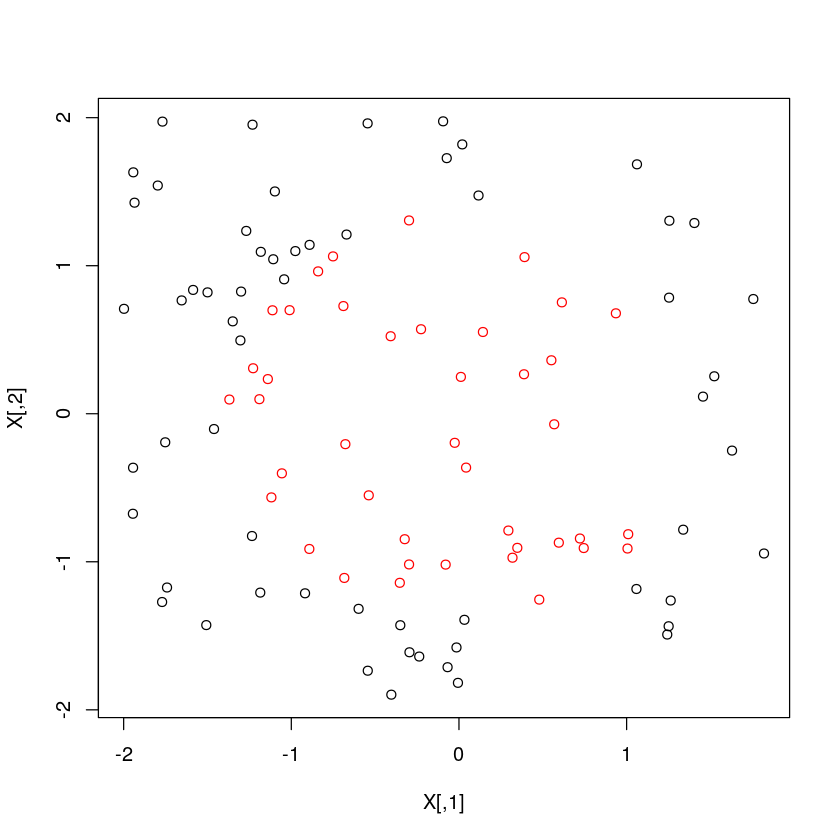

In [2]:
set.seed(11)
X = matrix(runif(100*2,-2,2), ncol=2)
e = rnorm(100,0,0.1)
y = ifelse(X[,1]^2+X[,2]^2+e>2,1,2)
plot(X, col=y)

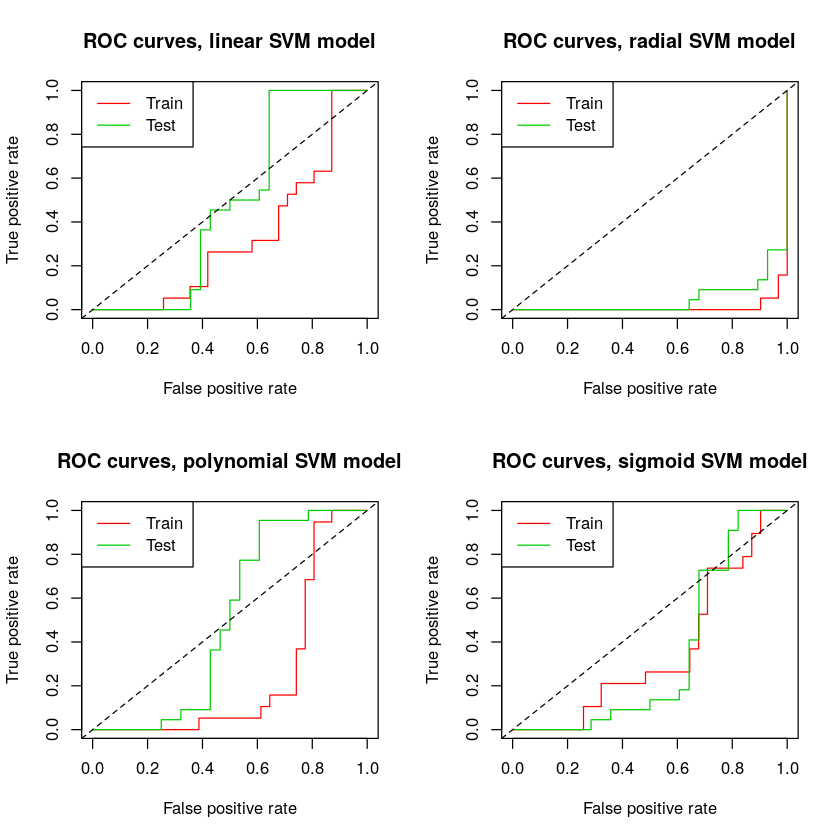

In [3]:
df = data.frame(X=X, y=as.factor(y))
set.seed(22)
train = sample(100,50)

kernel = c('linear', 'radial', 'polynomial', 'sigmoid')
par(mfrow=c(2,2))
for(k in 1:4){
    svmfit = svm(y~., data=df[train,], kernel=kernel[k], cost=1)
    fitted = attributes(predict(svmfit,df[train,], decision.values=T))$decision.values
    fitted_ob = prediction(fitted, df[train,'y'])
    fit_performance = performance(fitted_ob, 'tpr', 'fpr')
    plot(fit_performance, col=2, main=paste0('ROC curves, ',kernel[k],' SVM model'))
    pred = attributes(predict(svmfit,df[-train,], decision.values=T))$decision.values
    pred_ob = prediction(pred, df[-train,'y'])
    pred_performance = performance(pred_ob, 'tpr', 'fpr')
    plot(pred_performance, col=3, add=T)
    abline(a=0, b=1, lty=2)
    legend('topleft',legend=c('Train','Test'), col=c(2,3), lty=1)
}


radial

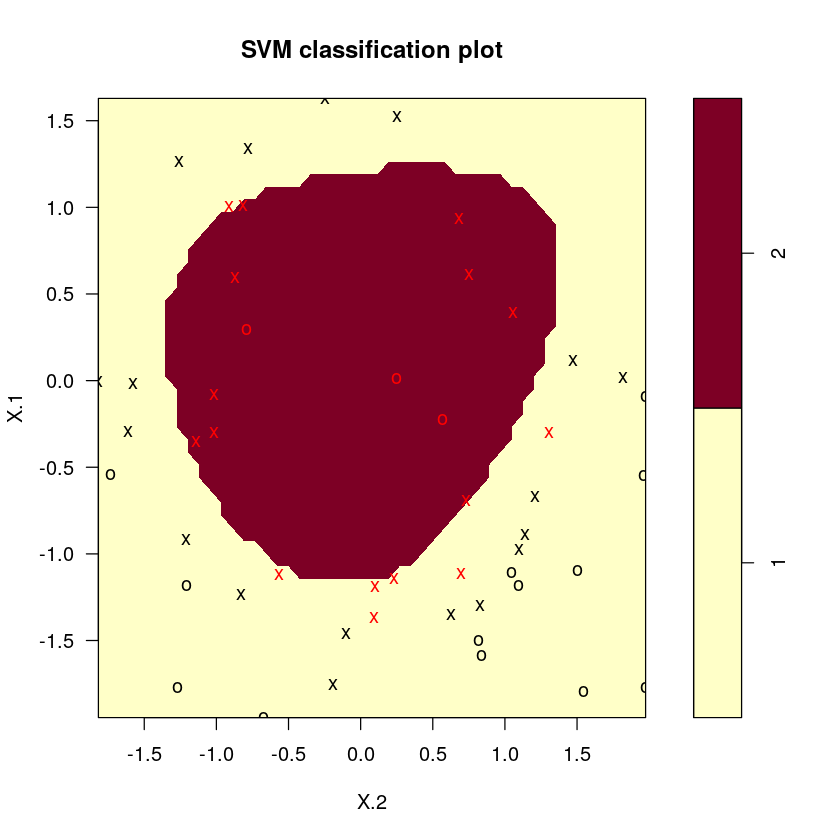

In [4]:
svmfit = svm(y~., data=df[train,], kernel=kernel[2], cost=1)
cat(kernel[2])
plot(svmfit, df[train,])

polynomial

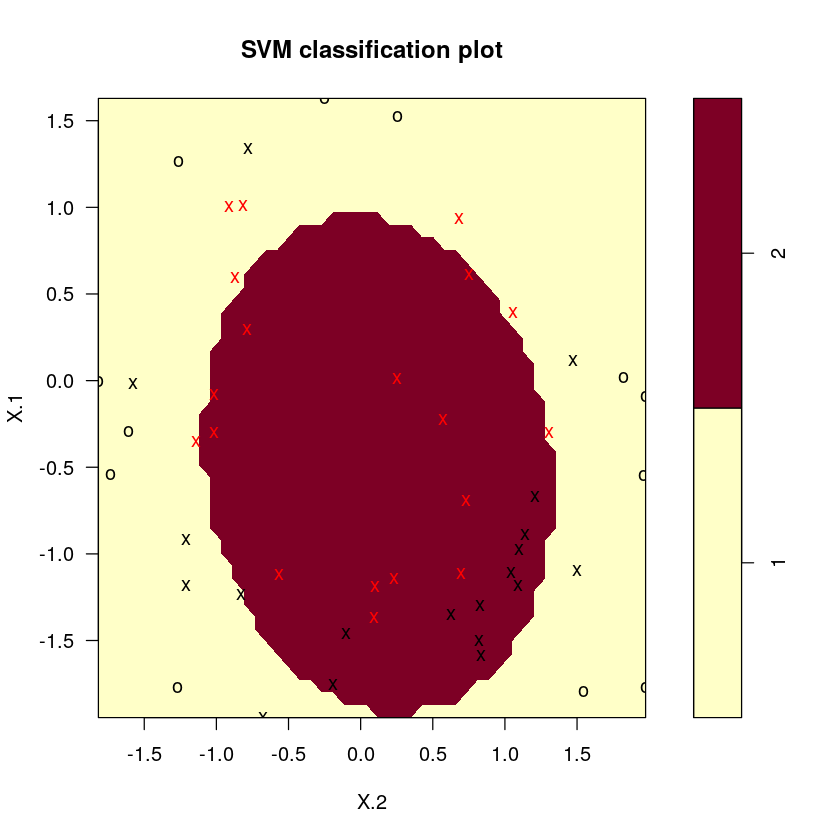

In [5]:
svmfit = svm(y~., data=df[train,], kernel=kernel[3], cost=1, degree=2)
cat(kernel[3])
plot(svmfit, df[train,])

sigmoid

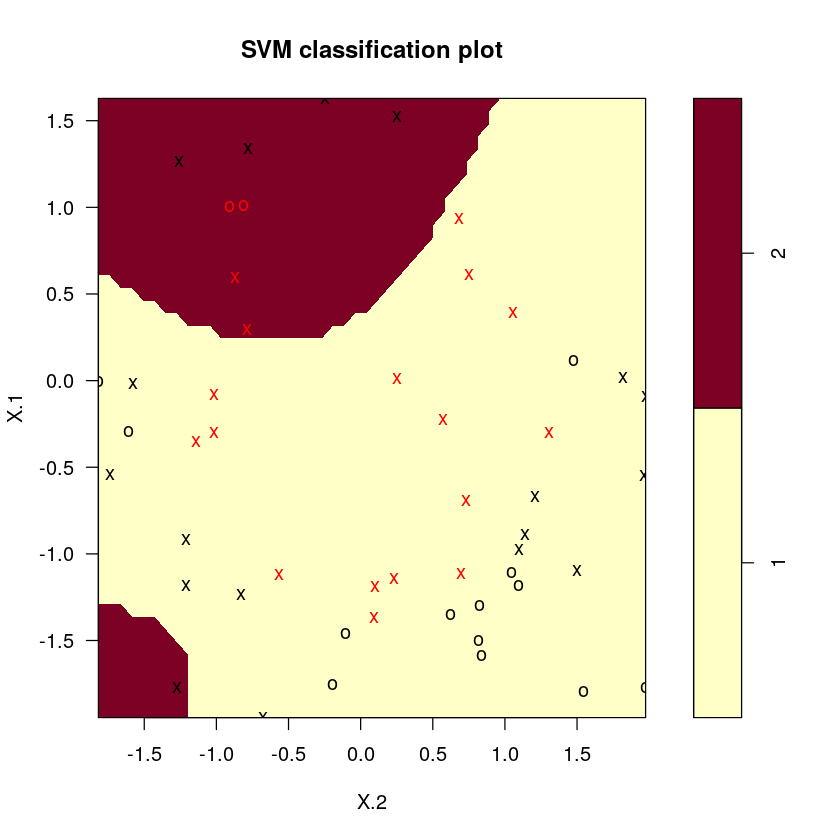

In [6]:
svmfit = svm(y~., data=df[train,], kernel=kernel[4], cost=1)
cat(kernel[4])
plot(svmfit, df[train,])

### 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

#### (a) Generate a data set with $n$ = 500 and $p$ = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:
```
> x1 = runif (500) -0.5
> x2 = runif (500) -0.5
> y =1*( x1 ^2 - x2 ^2 > 0)
```

#### (b) Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the $x$-axis, and $X_2$ on the $y$-axis.

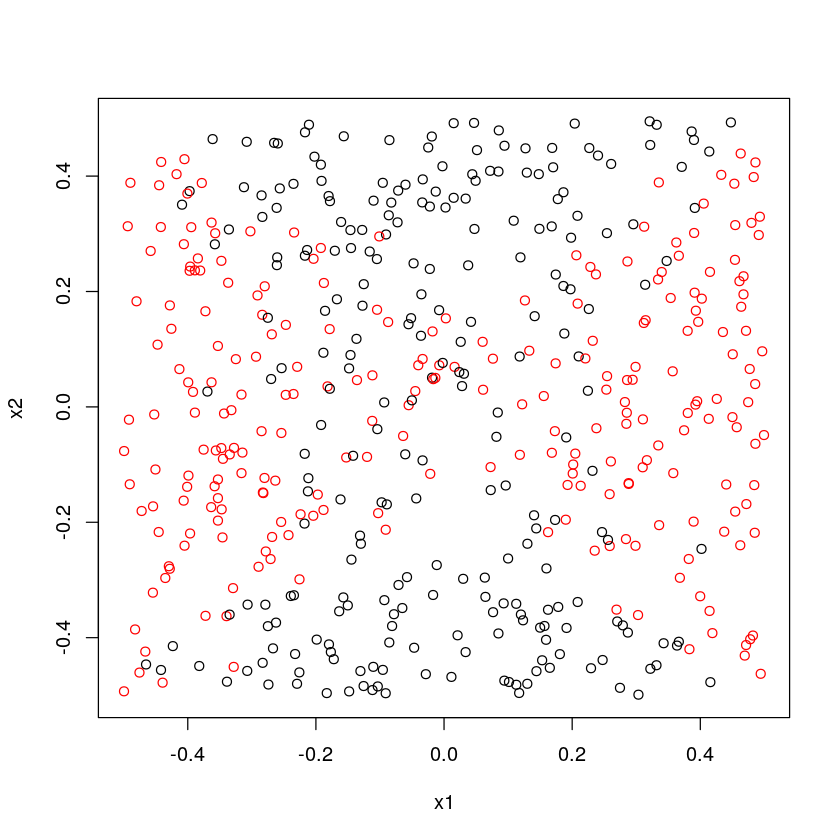

In [7]:
set.seed(123)
x1 = runif(500) -0.5
x2 = runif(500) -0.5
e = rnorm(500,0,0.05)
y =1*( x1 ^2 - x2 ^2 +e> 0)

plot(x1, x2, col=as.factor(y))

#### (c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

#### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

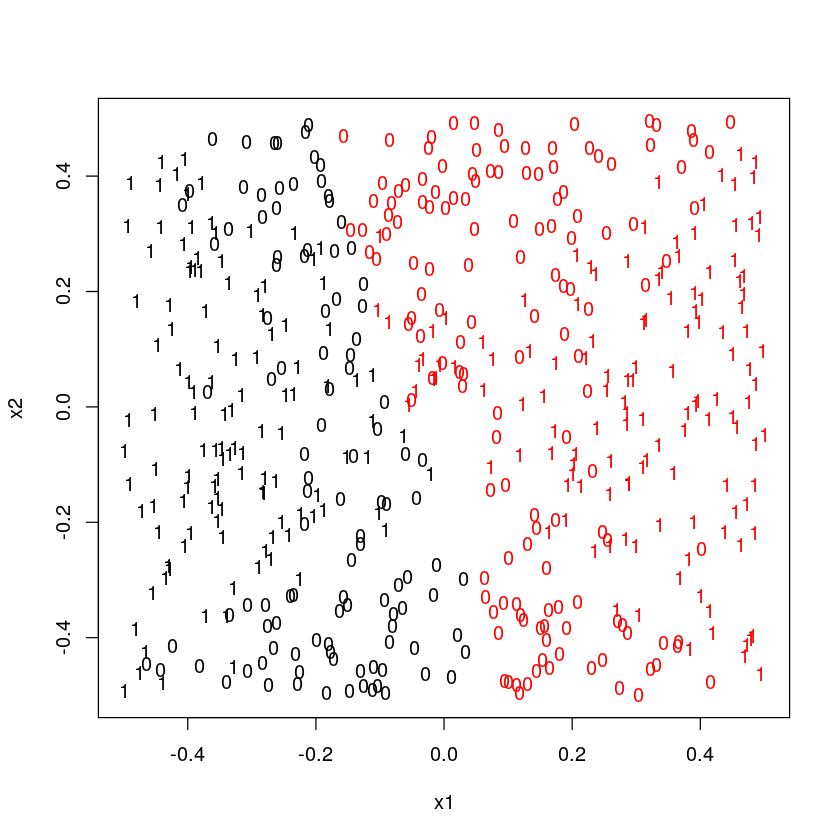

In [8]:
logit = glm(y~x1+x2,'binomial')
pred = 1*(predict(logit, type='response') > .5)
plot(x1, x2, col=as.factor(pred), pch = as.character(y))

#### (e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$ , $X_1 \times X_2$ , $\log(X_2)$, and so forth).

#### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

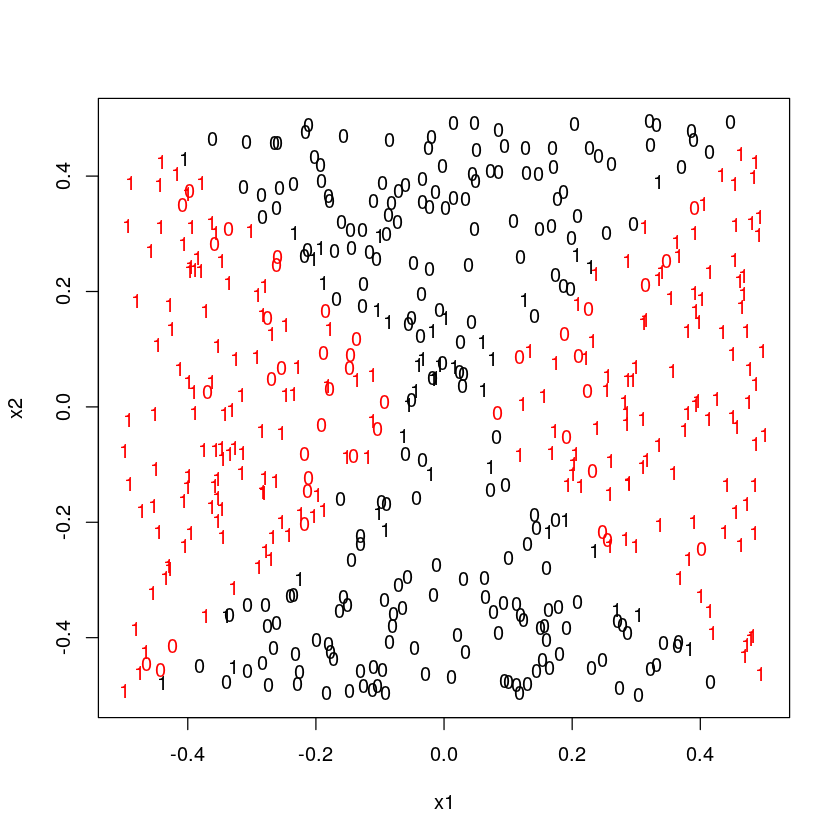

In [9]:
logit = glm(y~I(x1^2)+I(x2^2),'binomial')
pred = 1*(predict(logit, type='response') > .5)
plot(x1, x2, col=as.factor(pred), pch = as.character(y))

#### (g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

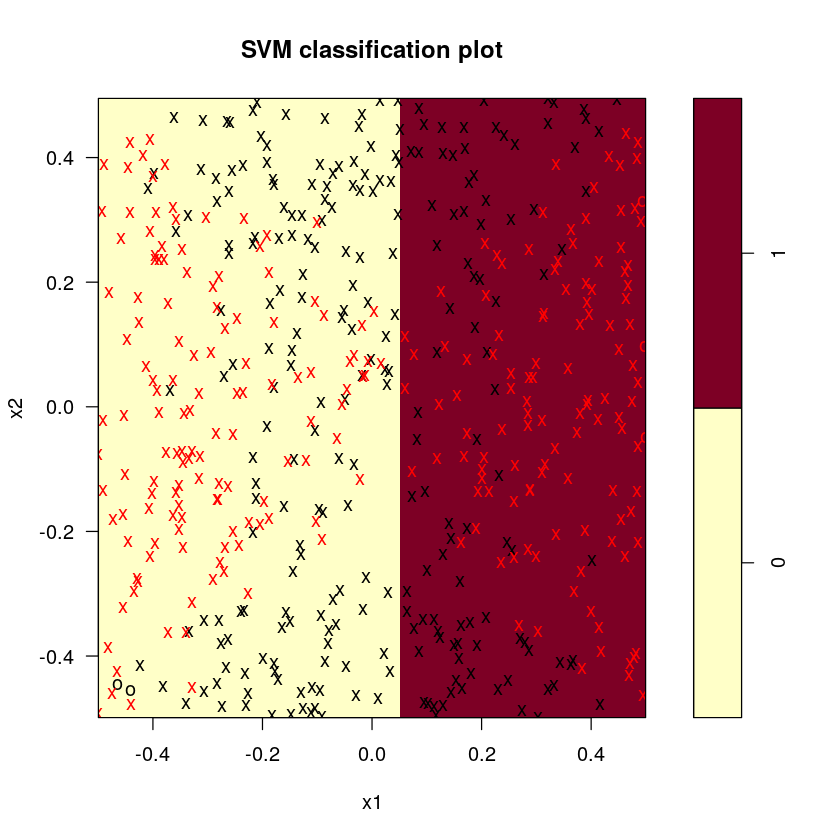

In [10]:
df = data.frame(y=as.factor(y),x1=x1,x2=x2)
svmfit = svm(y~x2+x1, data=df, kernel='linear', cost=1, gamma=1)
plot(svmfit, df)

#### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

#### (i) Comment on your results.

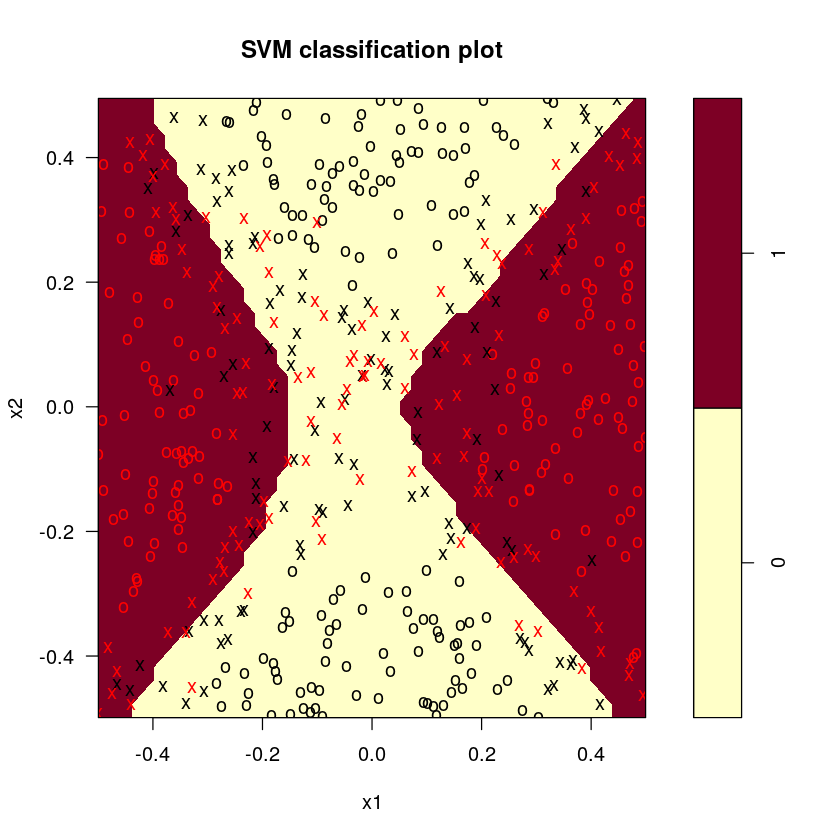

In [11]:
svmfit = svm(y~x2+x1, data=df, kernel='radial', cost=1, gamma=1)
plot(svmfit, df)

In [12]:
# results are almost identical to non linear logit

### 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.

#### (a) Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable.

#### (b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?

#### (c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

#### (d) Discuss your results.

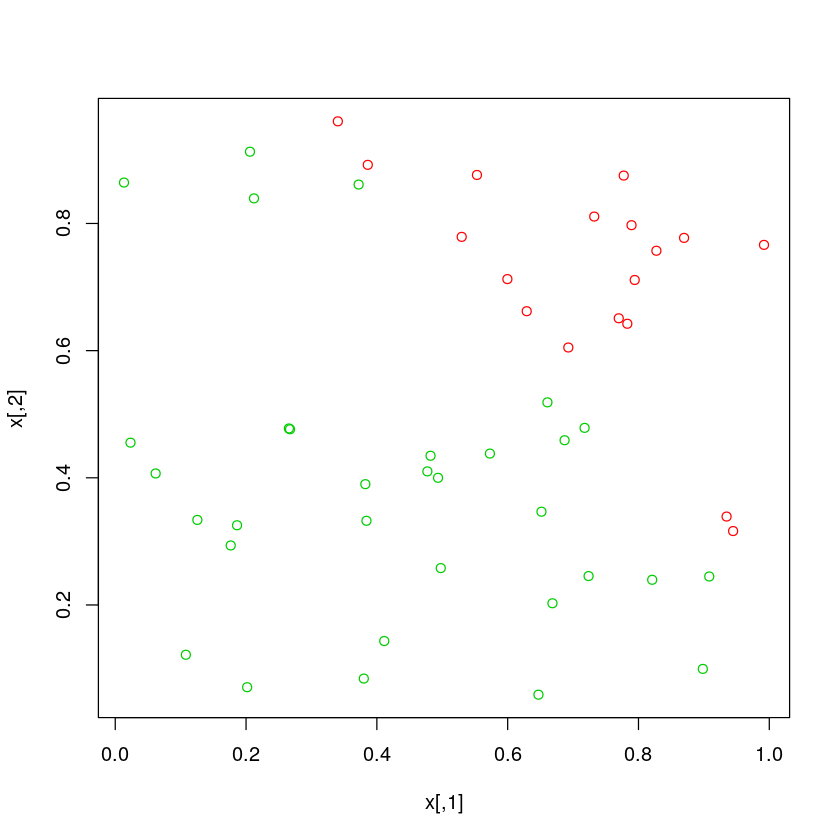

In [72]:
set.seed(1)
n=25
x = matrix(runif(n*4), ncol=2)
y = 1*(x[,1]+x[,2]>1.25)
plot(x, col=(3-y))
train = 1:n
df = data.frame(y=as.factor(y), x=x)

In [73]:
for (cost in c(0.1, 0.5, 1, 2, 3, 4, 5)){
    svmfit = svm(y~., data=df[train,], kernel='linear', cost=cost)
    accuracy1 = 100*mean(predict(svmfit, df[train,])!=df$y[train])
    accuracy2 = 100*mean(predict(svmfit, df[-train,])!=df$y[-train])
    cat(paste0('For the cost parameter ',cost, 
               '\n     the fitted misclassification is ',accuracy1,
               '%\n and the test missclassification is ',accuracy2,'%.\n\n'))
}


For the cost parameter 0.1
     the fitted misclassification is 24%
 and the test missclassification is 48%.

For the cost parameter 0.5
     the fitted misclassification is 16%
 and the test missclassification is 24%.

For the cost parameter 1
     the fitted misclassification is 12%
 and the test missclassification is 24%.

For the cost parameter 2
     the fitted misclassification is 4%
 and the test missclassification is 20%.

For the cost parameter 3
     the fitted misclassification is 4%
 and the test missclassification is 16%.

For the cost parameter 4
     the fitted misclassification is 4%
 and the test missclassification is 20%.

For the cost parameter 5
     the fitted misclassification is 8%
 and the test missclassification is 20%.



### 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

#### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

#### (b) Fit a support vector classifier to the data with various values of `cost` , in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

#### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of `gamma` and `degree` and `cost` . Comment on your results.

#### (d) Make some plots to back up your assertions in (b) and (c).

Hint: In the lab, we used the `plot()` function for svm objects only in cases with $p = 2$. When $p > 2$, you can use the `plot()` function to create plots displaying pairs of variables at a time. Essentially, instead of typing
```
> plot(svmfit , dat)
```
where `svmfit` contains your fitted model and `dat` is a data frame containing your data, you can type
```
> plot(svmfit, dat, x1∼x4)
```
in order to plot just the first and fourth variables. However, you must replace `x1` and `x4` with the correct variable names. To find out more, type `?plot.svm`.

For the cost parameter 0.001
     the fitted misclassification is 19.3877551020408%
 and the test missclassification is 21.4285714285714%.

For the cost parameter 0.025
     the fitted misclassification is 8.16326530612245%
 and the test missclassification is 9.18367346938776%.

For the cost parameter 0.05
     the fitted misclassification is 7.6530612244898%
 and the test missclassification is 9.18367346938776%.

For the cost parameter 0.1
     the fitted misclassification is 6.12244897959184%
 and the test missclassification is 9.18367346938776%.

For the cost parameter 0.2
     the fitted misclassification is 5.61224489795918%
 and the test missclassification is 9.18367346938776%.

For the cost parameter 0.5
     the fitted misclassification is 2.55102040816327%
 and the test missclassification is 10.7142857142857%.

For the cost parameter 1
     the fitted misclassification is 0.510204081632653%
 and the test missclassification is 11.2244897959184%.

For the cost parameter 2
     t

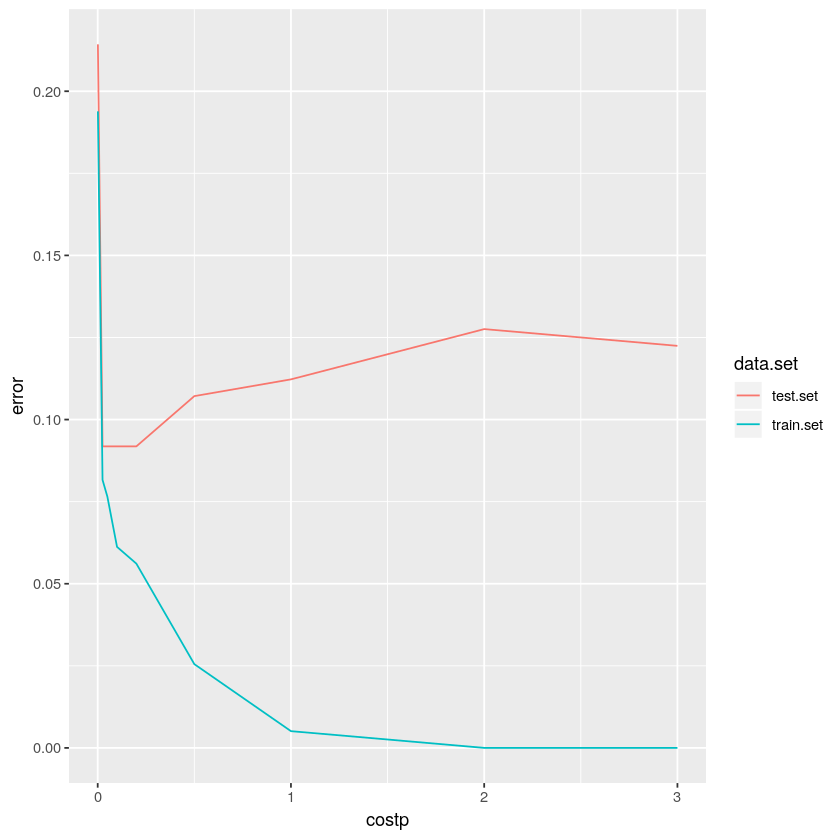

In [96]:
y = as.factor(1*(median(Auto$mpg)<Auto$mpg))
n = nrow(Auto)
set.seed(123)
train = sample(1:n, n/2)

df = cbind(y, Auto[,-1])

params = data.frame(costp=c(0.001, 0.025, 0.05, 0.1, 0.2, 0.5, 1, 2, 3))

results = params  %>% 
    group_by(costp)  %>% 
    mutate(train.set = mean(1*(predict(svm(y~., data=df[train,], kernel='linear', cost=costp),
                                df[train,])!=df$y[train])),
           test.set = mean(1*(predict(svm(y~., data=df[train,], kernel='linear', cost=costp),
                               df[-train,])!=df$y[-train])))

results %>%
    gather('data.set','error',-costp) %>% 
    ggplot(aes(costp,error,color=data.set)) +
    geom_line()
    

for (cost in c(0.001, 0.025, 0.05, 0.1, 0.2, 0.5, 1, 2, 3)){
    svmfit = svm(y~., data=df[train,], kernel='linear', cost=cost)
    accuracy1 = 100*mean(predict(svmfit, df[train,])!=df$y[train])
    accuracy2 = 100*mean(predict(svmfit, df[-train,])!=df$y[-train])
    cat(paste0('For the cost parameter ',cost, 
               '\n     the fitted misclassification is ',accuracy1,
               '%\n and the test missclassification is ',accuracy2,'%.\n\n'))
}


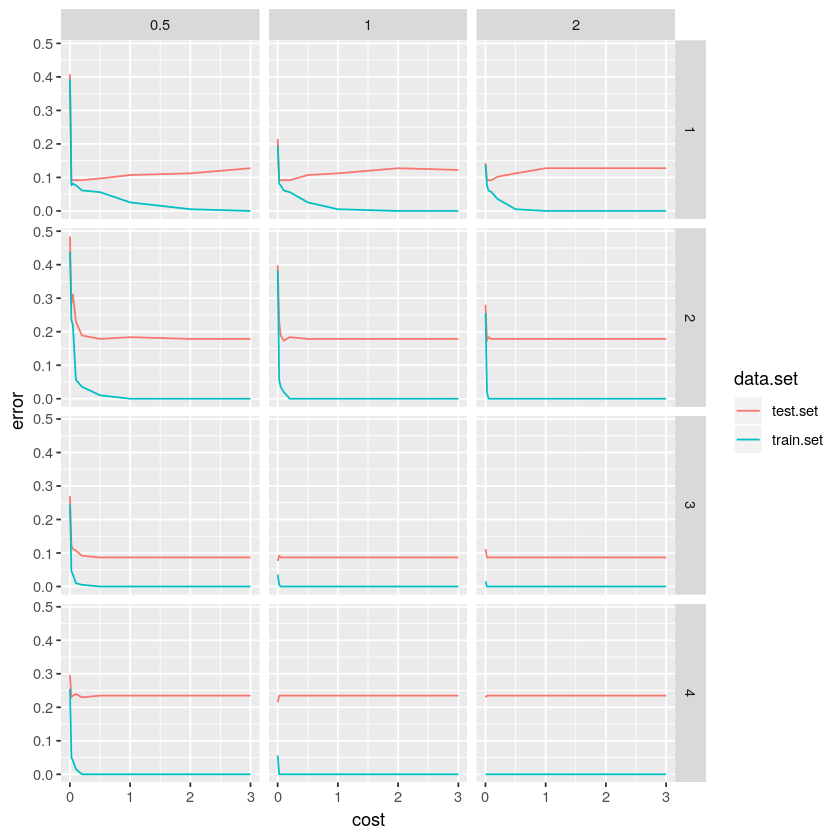

In [100]:
params1 = data.frame(cost=c(0.001, 0.025, 0.05, 0.1, 0.2, 0.5, 1, 2, 3))
params2 = data.frame(degree=c(1,2,3,4))
params3 = data.frame(gamma=c(0.5,1,2))

params = Reduce(merge, list(params1, params2, params3))

results = params  %>% 
    group_by(cost, degree, gamma)  %>% 
    mutate(train.set = mean(1*(predict(svm(y~., data=df[train,], 
                                           kernel='polynomial', cost=cost,
                                           degree=degree, gamma=gamma),
                                df[train,])!=df$y[train])),
           test.set = mean(1*(predict(svm(y~., data=df[train,], 
                                           kernel='polynomial', cost=cost,
                                           degree=degree, gamma=gamma),
                               df[-train,])!=df$y[-train])))

results %>%
    gather('data.set','error',c(train.set, test.set)) %>% 
    ggplot(aes(cost,error,color=data.set)) +
    geom_line() + 
    facet_grid(degree~gamma)


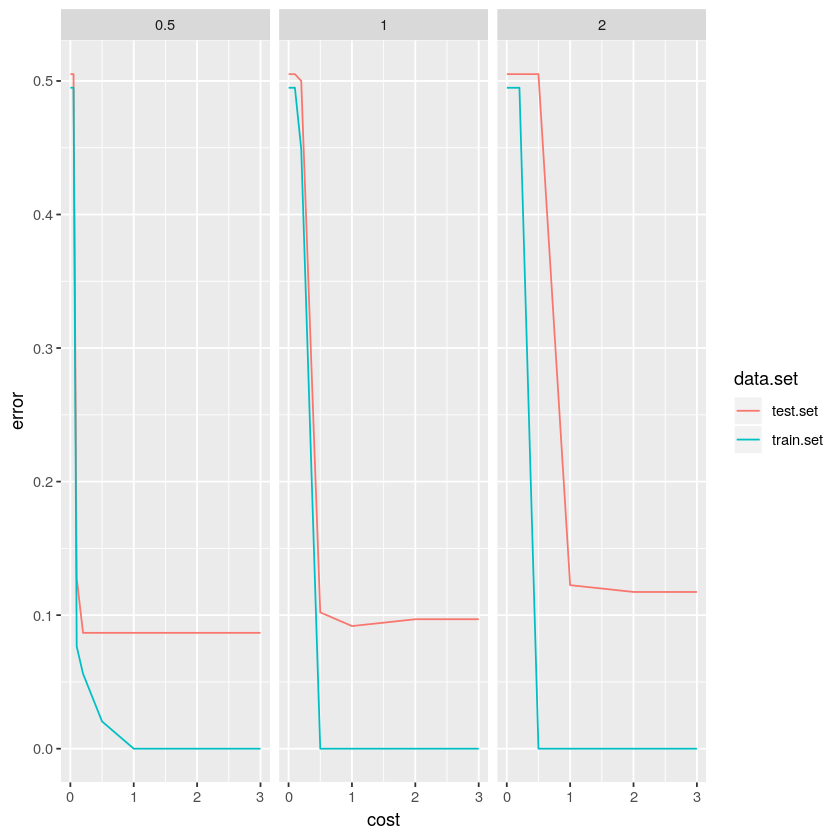

In [102]:
params1 = data.frame(cost=c(0.001, 0.025, 0.05, 0.1, 0.2, 0.5, 1, 2, 3))
params2 = data.frame(gamma=c(0.5,1,2))

params = merge(params1, params2)

results = params  %>% 
    group_by(cost, gamma)  %>% 
    mutate(train.set = mean(1*(predict(svm(y~., data=df[train,], 
                                           kernel='radial', cost=cost,
                                           gamma=gamma),
                                df[train,])!=df$y[train])),
           test.set = mean(1*(predict(svm(y~., data=df[train,], 
                                           kernel='radial', cost=cost,
                                           gamma=gamma),
                               df[-train,])!=df$y[-train])))

results %>%
    gather('data.set','error',c(train.set, test.set)) %>% 
    ggplot(aes(cost,error,color=data.set)) +
    geom_line() + 
    facet_grid(.~gamma)

In [ ]:
# d TBD

### 8. This problem involves the `OJ` data set which is part of the `ISLR` package.

#### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

#### (b) Fit a support vector classifier to the training data using `cost=0.01` , with Purchase as the response and the other variables as predictors. Use the `summary()` function to produce summary statistics, and describe the results obtained.

#### (c) What are the training and test error rates?

#### (d) Use the `tune()` function to select an optimal `cost`. Consider values in the range 0.01 to 10.

#### (e) Compute the training and test error rates using this new value for `cost`.

#### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for `gamma`.

#### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree=2`.

#### (h) Overall, which approach seems to give the best results on this data?

In [106]:
set.seed(123)
n = nrow(OJ)
train = sample(1:n, 800)

svmfit = svm(Purchase~., data=OJ[train,], kernel='linear', cost=0.01)

summary(svmfit)

train.error = mean(1*(predict(svmfit, OJ[train,])!=OJ$Purchase[train]))
test.error = mean(1*(predict(svmfit, OJ[-train,])!=OJ$Purchase[-train]))

cat('Cost',0.01, 'produced train error', train.error, 'and test error', test.error)


Call:
svm(formula = Purchase ~ ., data = OJ[train, ], kernel = "linear", 
    cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 220 222 )


Number of Classes:  2 

Levels: 
 CH MM




Cost 0.01 produced train error 0.165 and test error 0.1777778

In [107]:
set.seed(1)
tuned.svm = tune(svm, Purchase~., data=OJ[train,], kernel="linear",
                 ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)))
summary(tuned.svm)
summary(tuned.svm$best.model)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.1675 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.17750 0.03987829
2  0.05 0.17125 0.03537988
3  0.10 0.17375 0.03928617
4  0.50 0.17000 0.03917553
5  1.00 0.16750 0.03782269
6  5.00 0.16875 0.03596391
7 10.00 0.16750 0.03184162



Call:
best.tune(method = svm, train.x = Purchase ~ ., data = OJ[train, 
    ], ranges = list(cost = c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  340

 ( 170 170 )


Number of Classes:  2 

Levels: 
 CH MM




In [113]:
train.error = mean(1*(predict(tuned.svm$best.model, OJ[train,])!=OJ$Purchase[train]))
test.error = mean(1*(predict(tuned.svm$best.model, OJ[-train,])!=OJ$Purchase[-train]))

cat('SVM with linear kernel and cost',1 , 'produced train error', train.error, 'and test error', test.error)

SVM with linear kernel and cost 1 produced train error 0.16 and test error 0.1555556

In [112]:
tuned.svm$best.model$cost

[1] 1

In [114]:
set.seed(1)

kernel='radial'

svmfit = svm(Purchase~., data=OJ[train,], kernel=kernel, cost=0.01)
train.error = mean(1*(predict(svmfit, OJ[train,])!=OJ$Purchase[train]))
test.error = mean(1*(predict(svmfit, OJ[-train,])!=OJ$Purchase[-train]))
summary(svmfit)
cat('SVM with', kernel, 
    'kernel and cost', 0.01, 
    'produced train error', train.error, 
    'and test error', test.error)

tuned.svm = tune(svm, Purchase~., data=OJ[train,], kernel=kernel,
                 ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)))
summary(tuned.svm)
summary(tuned.svm$best.model)
train.error = mean(1*(predict(tuned.svm$best.model, OJ[train,])!=OJ$Purchase[train]))
test.error = mean(1*(predict(tuned.svm$best.model, OJ[-train,])!=OJ$Purchase[-train]))

cat('SVM with', kernel, 
    'kernel and cost', tuned.svm$best.model$cost,
    'produced train error', train.error,
    'and test error', test.error)


Call:
svm(formula = Purchase ~ ., data = OJ[train, ], kernel = kernel, 
    cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 

Number of Support Vectors:  629

 ( 313 316 )


Number of Classes:  2 

Levels: 
 CH MM




SVM with radial kernel and cost 0.01 produced train error 0.39125 and test error 0.3851852


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.16125 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.39125 0.04752558
2  0.05 0.22000 0.02958040
3  0.10 0.17500 0.03952847
4  0.50 0.16500 0.03106892
5  1.00 0.16250 0.03280837
6  5.00 0.16125 0.03793727
7 10.00 0.16750 0.03827895



Call:
best.tune(method = svm, train.x = Purchase ~ ., data = OJ[train, 
    ], ranges = list(cost = c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)), kernel = kernel)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  5 

Number of Support Vectors:  328

 ( 161 167 )


Number of Classes:  2 

Levels: 
 CH MM




SVM with radial kernel and cost 5 produced train error 0.1375 and test error 0.2

In [115]:
set.seed(1)

kernel='polynomial'

svmfit = svm(Purchase~., data=OJ[train,], kernel=kernel, cost=0.01, degree=2)
train.error = mean(1*(predict(svmfit, OJ[train,])!=OJ$Purchase[train]))
test.error = mean(1*(predict(svmfit, OJ[-train,])!=OJ$Purchase[-train]))
summary(svmfit)
cat('SVM with', kernel, 
    'kernel and cost', 0.01, 
    'produced train error', train.error, 
    'and test error', test.error)

tuned.svm = tune(svm, Purchase~., data=OJ[train,], kernel=kernel, degree=2,
                 ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)))
summary(tuned.svm)
summary(tuned.svm$best.model)
train.error = mean(1*(predict(tuned.svm$best.model, OJ[train,])!=OJ$Purchase[train]))
test.error = mean(1*(predict(tuned.svm$best.model, OJ[-train,])!=OJ$Purchase[-train]))

cat('SVM with', kernel, 
    'kernel and cost', tuned.svm$best.model$cost,
    'produced train error', train.error,
    'and test error', test.error)


Call:
svm(formula = Purchase ~ ., data = OJ[train, ], kernel = kernel, 
    cost = 0.01, degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  631

 ( 313 318 )


Number of Classes:  2 

Levels: 
 CH MM




SVM with polynomial kernel and cost 0.01 produced train error 0.3725 and test error 0.3740741


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.165 

- Detailed performance results:
   cost  error dispersion
1  0.01 0.3925 0.04533824
2  0.05 0.3325 0.03827895
3  0.10 0.3100 0.03162278
4  0.50 0.1925 0.03961621
5  1.00 0.1850 0.03425801
6  5.00 0.1700 0.03343734
7 10.00 0.1650 0.02813657



Call:
best.tune(method = svm, train.x = Purchase ~ ., data = OJ[train, 
    ], ranges = list(cost = c(0.01, 0.05, 0.1, 0.5, 1, 5, 10)), kernel = kernel, 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  337

 ( 168 169 )


Number of Classes:  2 

Levels: 
 CH MM




SVM with polynomial kernel and cost 10 produced train error 0.14375 and test error 0.2037037

In [ ]:
# Linear model produced the lowest error rate on the validation data.